In [1]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..')))
print(sys.executable)

D:\Work\Hillel\NLP\NLPServer\.venv\Scripts\python.exe


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from joblib import dump

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cremator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from api.api_v1.processing.processing import TextPreprocessor

### <center>Content

1. [Analysis](#1.-Analysis)
2. [Preprocessing](#2.-Preprocessing)
3. [Split data](#3.-Split-data)
4. [Tokenization and vectorization](#4.-Tokenization-and-vectorization)
5. [Cross-validation and fit](#5.-Cross-validation-and-fit)
6. [Results](#6.-Results)


## <center>1. Analysis

In [5]:
df = pd.read_csv('IMDB Dataset.csv', delimiter=',')
df.loc[df['sentiment'] == 'positive', 'sentiment'] = 1
df.loc[df['sentiment'] == 'negative', 'sentiment'] = 0
df['sentiment'] = df['sentiment'].astype(int)
pd.set_option('display.max_colwidth', 250)
df.head(20)

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes...",1
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well ch...",1
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the w...",1
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombi...",0
4,"Petter Mattei's ""Love in the Time of Money"" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different...",1
5,"Probably my all-time favorite movie, a story of selflessness, sacrifice and dedication to a noble cause, but it's not preachy or boring. It just never gets old, despite my having seen it some 15 or more times in the last 25 years. Paul Lukas' per...",1
6,I sure would like to see a resurrection of a up dated Seahunt series with the tech they have today it would bring back the kid excitement in me.I grew up on black and white TV and Seahunt with Gunsmoke were my hero's every week.You have my vote f...,1
7,"This show was an amazing, fresh & innovative idea in the 70's when it first aired. The first 7 or 8 years were brilliant, but things dropped off after that. By 1990, the show was not really funny anymore, and it's continued its decline further to...",0
8,"Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'a...",0
9,"If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it.<br /><br />Great Camp!!!",1


In [6]:
print(df.shape)
print(df.info())

(50000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 586.1+ KB
None


## <center>2. Preprocessing

In [7]:
preprocessor = TextPreprocessor()

In [8]:
%%time
df['review'] = df['review'].apply(preprocessor.preprocess)

D:\Work\Hillel\NLP\NLPServer\app\api\api_v1\processing\processing.py:15: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


CPU times: total: 44.8 s
Wall time: 1min 41s


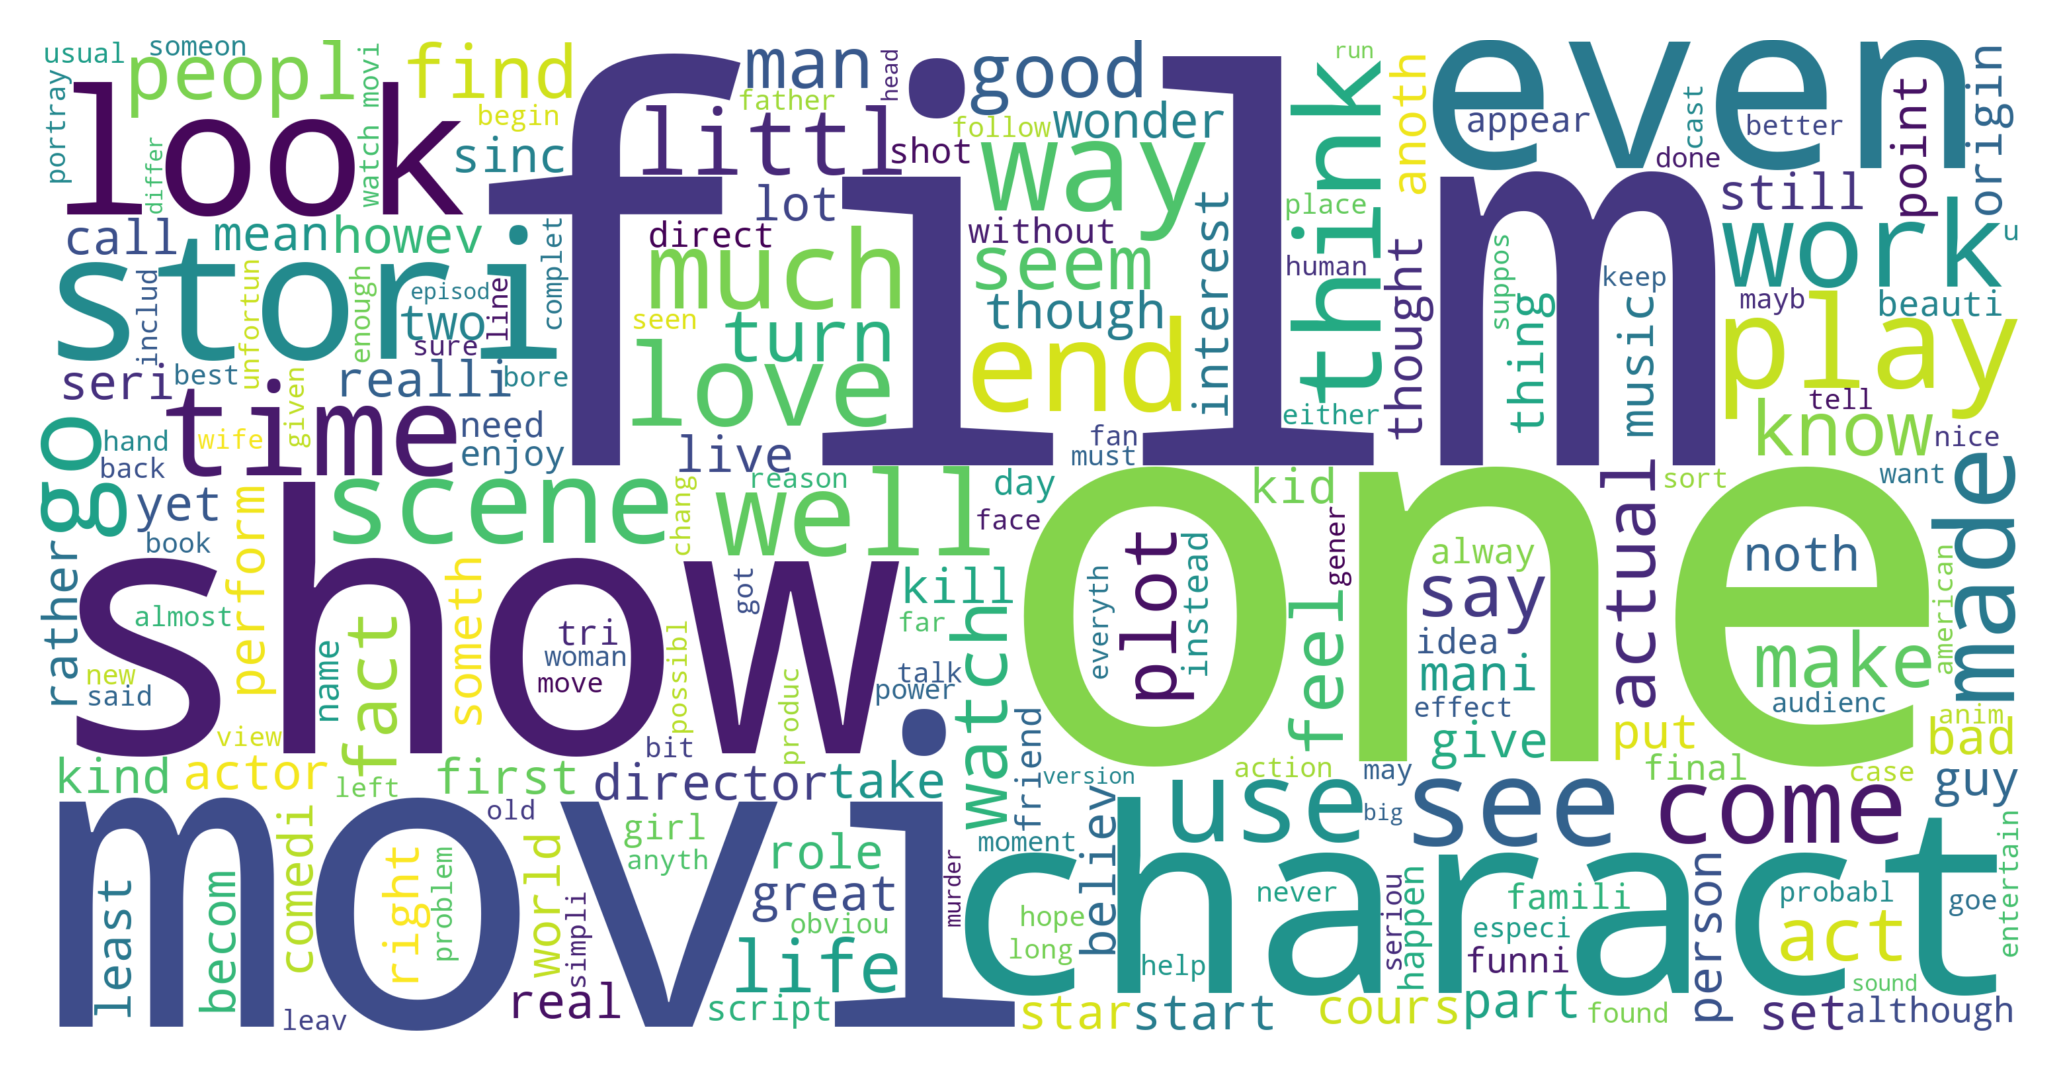

In [9]:
combined_text = ' '.join(df['review'].astype(str))
wordcloud = WordCloud(width=3000, height=1500, background_color='white').generate(combined_text)
plt.figure(dpi=400);
plt.imshow(wordcloud, interpolation='bilinear');
plt.axis('off');

In [10]:
df.head(20)

,review,sentiment
0,one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call o...,1
1,wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth wat...,1
2,thought wonder way spend time hot summer weekend sit air condit theater watch lightheart comedi plot simplist dialogu witti charact likabl even well bread suspect serial killer may disappoint realiz match point 2 risk addict thought proof woodi a...,1
3,basic there famili littl boy jake think there zombi closet parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first your go make film must decid thriller drama drama movi watchabl parent divorc argu like rea...,0
4,petter mattei love time money visual stun film watch mr mattei offer us vivid portrait human relat movi seem tell us money power success peopl differ situat encount variat arthur schnitzler play theme director transfer action present time new yor...,1
5,probabl alltim favorit movi stori selfless sacrific dedic nobl caus preachi bore never get old despit seen 15 time last 25 year paul luka perform bring tear eye bett davi one truli sympathet role delight kid grandma say like dressedup midget chil...,1
6,sure would like see resurrect date seahunt seri tech today would bring back kid excit mei grew black white tv seahunt gunsmok hero everi weekyou vote comeback new sea huntw need chang pace tv would work world water adventureoh way thank outlet li...,1
7,show amaz fresh innov idea 70 first air first 7 8 year brilliant thing drop 1990 show realli funni anymor continu declin complet wast time todayit truli disgrac far show fallen write pain bad perform almost bad mildli entertain respit guesthost s...,0
8,encourag posit comment film look forward watch film bad mistak ive seen 950 film truli one worst aw almost everi way edit pace storylin act soundtrack film song lame countri tune play less four time film look cheap nasti bore extrem rare happi se...,0
9,like origin gut wrench laughter like movi young old love movi hell even mom like itgreat camp,1


## <center>3. Split data

In [11]:
x = df['review']
y = df['sentiment']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=66, stratify=y)

## <center>4. Tokenization and vectorization

In [12]:
%%time

vectorizer = TfidfVectorizer()

x_train_tfidf = vectorizer.fit_transform(x_train)

x_test_tfidf = vectorizer.transform(x_test)

print("TF-IDF vocabulary size:", x_train_tfidf.shape[1])

TF-IDF vocabulary size: 155943
CPU times: total: 1.67 s
Wall time: 2.74 s


In [13]:
dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

## <center>5. Cross-validation and fit

In [14]:
%%time

grid = {"penalty": ["l2"], "solver": ["liblinear"], "C": [4.5, 4.75, 5, 5.25, 5.5]}

clf = LogisticRegression()

lr_tfidf = GridSearchCV(clf, param_grid=grid, scoring="f1_macro", n_jobs=-1, cv=5, verbose=5)

lr_tfidf.fit(x_train_tfidf, y_train)

print("Best parameters:", lr_tfidf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: total: 1.22 s
Wall time: 10.7 s


## <center>6. Results

In [15]:
lr_tfidf_preds = lr_tfidf.predict(x_test_tfidf)

print(classification_report(y_test, lr_tfidf_preds, target_names=["negative","positive"]))

              precision    recall  f1-score   support

    negative       0.90      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



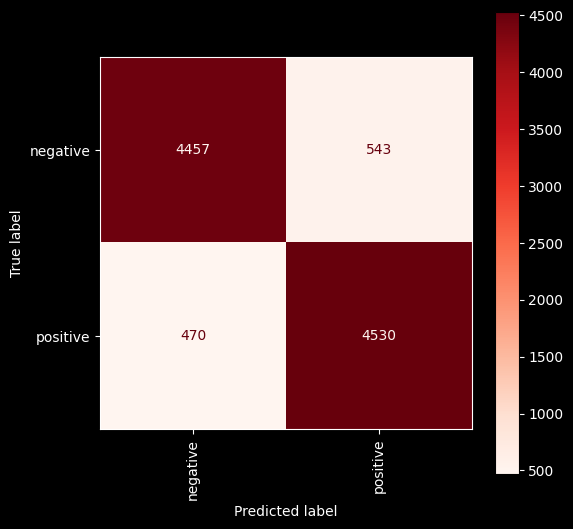

In [16]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.grid(False)

disp = ConfusionMatrixDisplay.from_estimator(lr_tfidf, x_test_tfidf, y_test, cmap="Reds", display_labels=["negative","positive"], xticks_rotation="vertical", ax=ax)

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

disp.ax_.set_title(disp.ax_.get_title(), color='white')
disp.ax_.set_xlabel(disp.ax_.get_xlabel(), color='white')
disp.ax_.set_ylabel(disp.ax_.get_ylabel(), color='white')
disp.ax_.tick_params(axis='both', colors='white')
disp.im_.colorbar.ax.yaxis.set_tick_params(color='white')
plt.setp(plt.getp(disp.im_.colorbar.ax.axes, 'yticklabels'), color='white')

plt.show()

## <center>7. Saving

In [17]:
dump(lr_tfidf, 'lr_tfidf_model.joblib')

['lr_tfidf_model.joblib']